# Basic Data Exploratory analysis for the PCOR file  

Before starting building the graphs and presenting the findings, I would like to have a basic analysis of the given data file the purposes of this analyses are:    
1. Having a better understanding of the general data structure. 
2. Looking at the null values in Stage and Margin Status to decide on the best way to handle missing values. 
3. Deciding the optimal time interval to present the percentage positive margin. 



In [5]:
#install the unavailable library and load the library
packages = c("plyr", "ggplot2",
             "scales", "stringr","tidyverse","readxl","lubridate",'DT','zoo','plotly')

## Now load or install&load all
package.check <- lapply(
  packages,
  FUN = function(x) {
    if (!require(x, character.only = TRUE)) {
      install.packages(x, dependencies = TRUE)
      library(x, character.only = TRUE)
    }
  }
)

### 1. Analysing the basic data structure. 

In [6]:
#read the dataframe
df<-read_excel('PCOR File.xlsx')
head(df)

Surgeon,SurgeryDt,Stage,MarginStatus
<chr>,<dttm>,<chr>,<dbl>
Al,2020-06-19,T2,0
Al,2018-11-08,T2,0
Al,2019-03-17,T2,0
Al,2018-03-01,T2,0
Al,2020-03-23,T2,0
Al,2018-03-21,T2,0


In [7]:
#check the dimension of the table
dim(df)

[1] 2087    4

In [8]:
#check the min and max of the surgery date
df$SurgeryDt <- format(as.Date(df$SurgeryDt), "%Y-%m-%d")
min(df$SurgeryDt)
max(df$SurgeryDt)

[1] "2018-01-01"

[1] "2020-12-31"

In [9]:
#check the surgeon names
unique(df$Surgeon)

[1] "Al" "Bo" "Cy" "Di" "Ed" "Mo" "Oz" "Ti" "Vi" "Zo"

In [10]:
#check the number of stages
unique(df$Stage)

[1] "T2"  "T3a" "T3"  "T3b" "T3A" "T3B" NA

#### Comments for the Stage data:     

We can see that there are some issues with the data that needs to be fixed. 

1. In terms of the stage T3 data, we have `T3a`,`T3b`,`T3A`,`T3B`, `T3`. We need to figure out a way to standardise the categories of stages. Firstly, `T3a`and `T3A`,`T3b` and `T3B` should be combined to keep the case letter consistent. Secondly, we need to decide on whether to present the data in 3 groups(`T3`,`T3a`,`T3b`) or one group(`T3`). Based on the definition of the Prostate cancer stages, T3a and T3b are substages of T3. It would be inappropriate to present the data in three groups: `T3a`,`T3b`,`T3`, because some of the `T3` data could be `T3a` or `T3b`. In addition, for the purpose of simplicity it would be better to combine all the data to just as `T3`.

2. There are null values for the Stage data. I will investigate the missing values further to make a suggestion on how to deal with the missing values. 


**Reference** (https://www.cancerresearchuk.org/about-cancer/prostate-cancer/stages/tnm-staging)

In [11]:
#check the number of Margin Status
unique(df$MarginStatus)

[1]  0  1 NA

#### Comments for the Margin Status data:     


From the result above we can also see there are missing values for the margin status. I will investigate this matter further in the following section. 



### 2. Analysing the missing values.      


In order to decide on the best strategy to handling missing values. I would like to first look at the total number of the missing values for Stage and Margin Status.

In [12]:
#Check the number of missing stages
length(df[is.na(df$Stage),]$Stage)

#check the number of missing margin status
length(df[is.na(df$MarginStatus),]$MarginStatus)

# Check the number of rows with both status and margin status as nulls.

length(df[is.na(df$MarginStatus)&is.na(df$Stage),]$MarginStatus)



[1] 33

[1] 49

[1] 29

As there is only a small percentage of data (out of the 2087 records) are nulls, we are able to inspect the null values by eyes. 

In [13]:
#Check the null values for the Stage.
df[is.na(df$Stage),]

Surgeon,SurgeryDt,Stage,MarginStatus
<chr>,<chr>,<chr>,<dbl>
Ed,2020-08-29,NA,NA
Ed,2018-04-21,NA,NA
Ed,2018-02-05,NA,NA
Ed,2020-03-01,NA,NA
Ed,2019-07-08,NA,NA
Ed,2018-02-22,NA,NA
Ed,2018-03-28,NA,NA
Ed,2019-09-04,NA,NA
Ed,2020-12-05,NA,NA


In [14]:
#Chcke the null values for Margin status
df[is.na(df$MarginStatus),]

Surgeon,SurgeryDt,Stage,MarginStatus
<chr>,<chr>,<chr>,<dbl>
Cy,2020-03-20,T3a,NA
Cy,2019-01-05,T3a,NA
Cy,2018-06-23,T3a,NA
Di,2020-04-24,T2,NA
Di,2020-06-11,T2,NA
Di,2019-08-27,T2,NA
Di,2020-02-15,T2,NA
Di,2020-02-08,T2,NA
Di,2020-09-10,T2,NA


#### Comments for Stage and Margin Status missing values:

In terms of the missing Margin Status values,  I decide to delete all the rows with missing Margin Status, because the actual Margin Statuses for these records are unknown and when we calculate the percentage positive margin, we should not make any assumption on these values. In addition, theres only a small number of records as null, so it would not affect the final result significantly. 

In terms of the missing Stage values, I also decide to delete all the rows with missing Stage status. As most rows with missing Stage status also have the Margin Status as missing(29 out of 33 rows). After deleting all the null Margin Status values, there are only 4 rows left with missing Stage values,even if I had three categories for the Stage status: `T2`,`T3`,`NA`, the data would not be big enough to produce any representative result. Therefore, I decide to delete all the null values from Stage column.

### Standardising the Stage column and removing null values.


From the discussions above, I should:
1. Standardising the Stage values to `T2`,`T3`.
2. Removing missing values from the Stage and Margin Status Columns.

In [15]:
#Remove the null values
df_complete <- df[is.na(df$MarginStatus)==FALSE&is.na(df$Stage)==FALSE,]
#Create a new column to store the correct stage data
df_complete$correct_stage=substr(df_complete$Stage, 1, 2)


### 3. Investigating the best time intervel for percentage margin status.

Firstly, I looked at the number of surgeries a day by a histogram. The Histogram labels indicate the start of each week.

In [16]:
#calculate the counts of the surgery every day
df_complete$SurgeryDt=format(as.Date(df_complete$SurgeryDt), "%Y-%m-%d")
dayfreqs <- aggregate(df_complete$SurgeryDt, by=list(df_complete$SurgeryDt), FUN=length)
dayfreqs$Group.1 <- as.Date(dayfreqs$Group.1, format="%Y-%m-%d")

**For a better visual presentation of my results, I only showed the data from the first half of the 2018.**

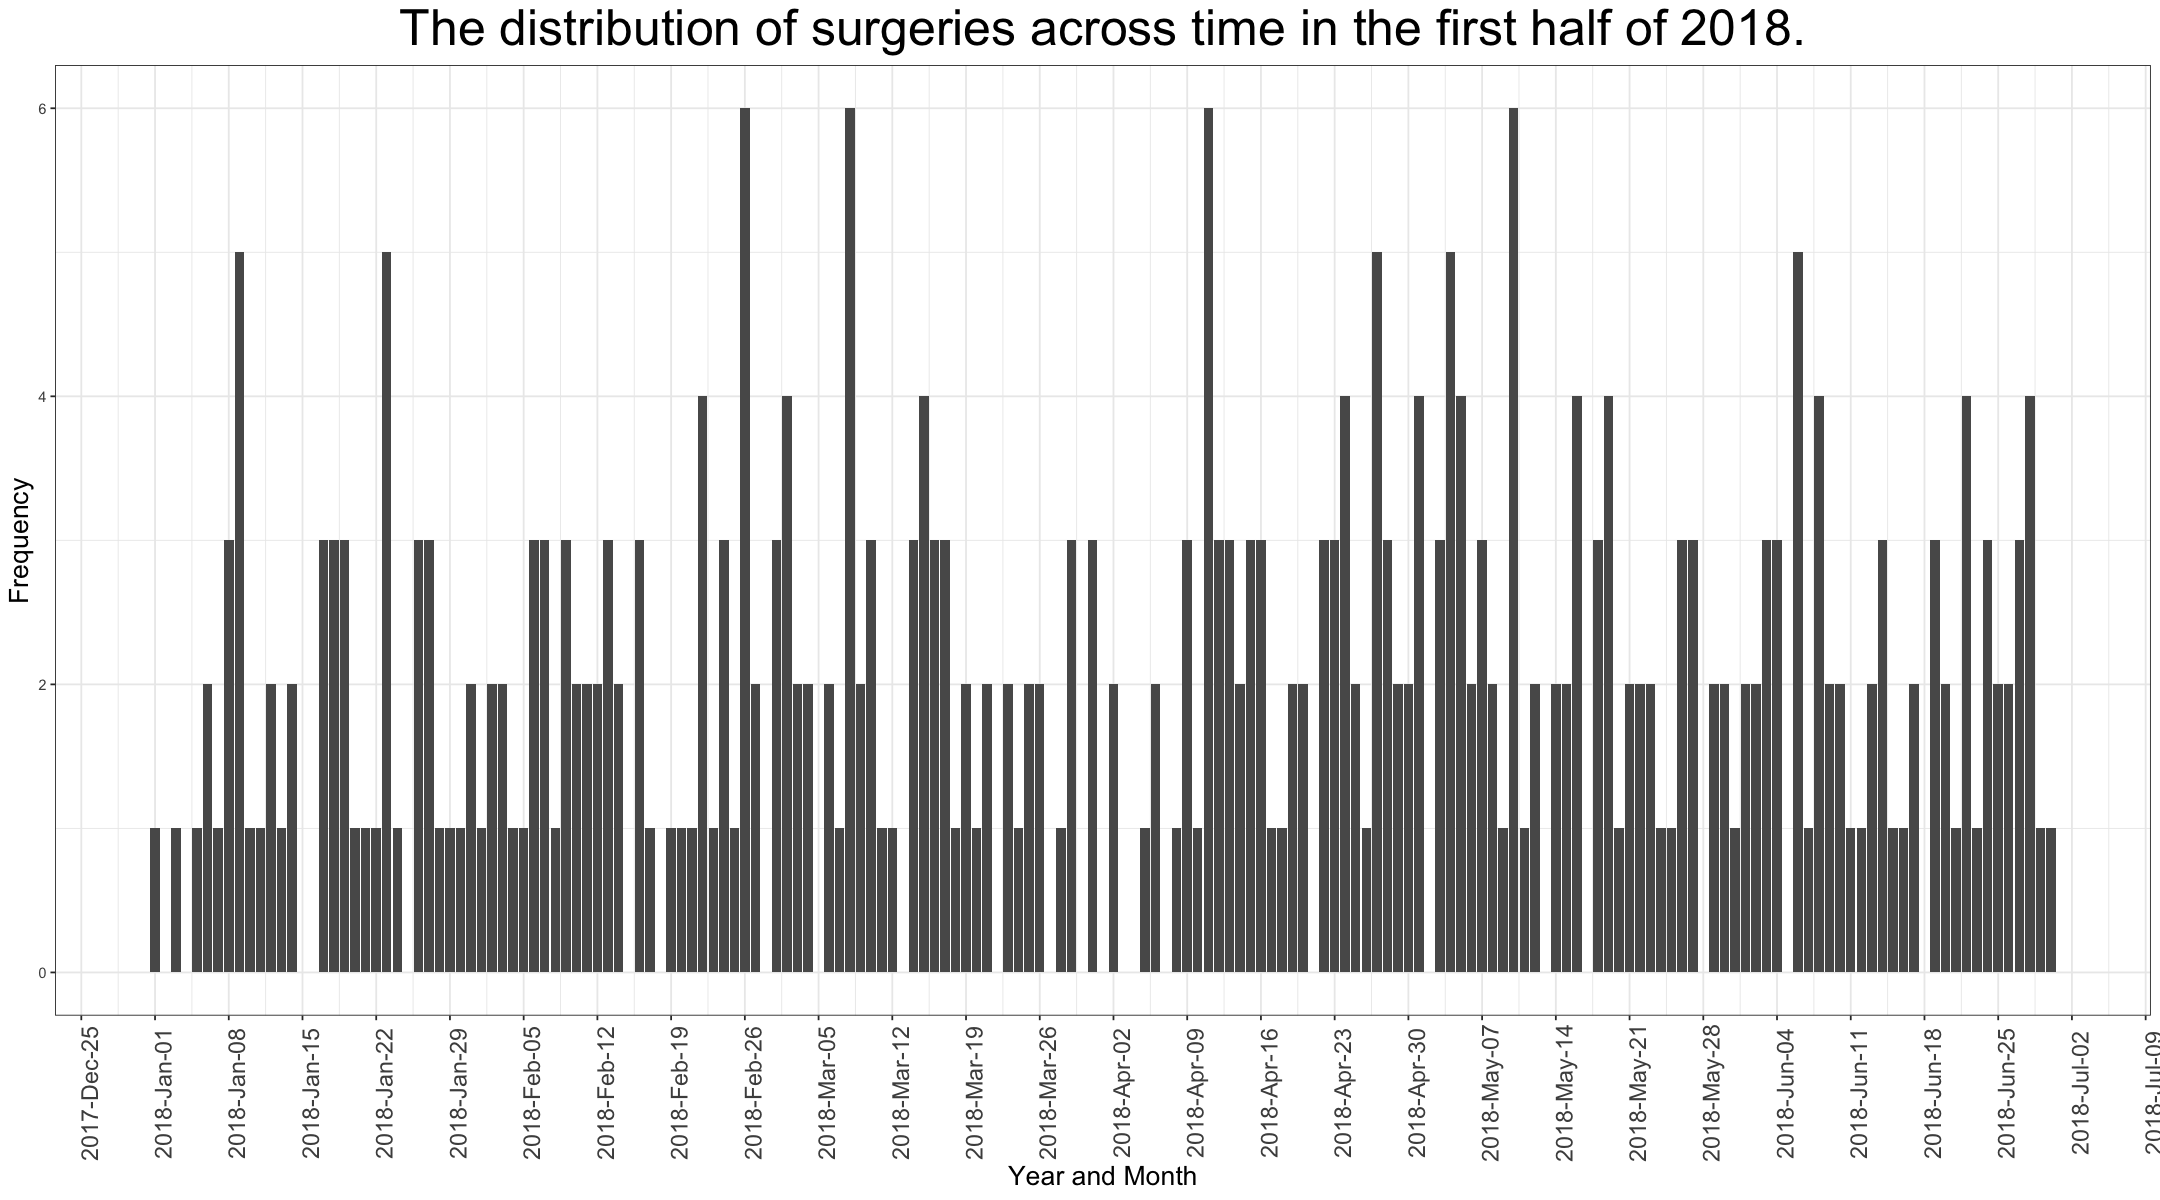

In [17]:
#Plotting the histogram
options(repr.plot.width=18, repr.plot.height=10)

ggplot(dayfreqs[(format(dayfreqs$Group.1,'%Y')=='2018')&(format(dayfreqs$Group.1,'%m')<'07'),], aes(x=Group.1, y=x)) + geom_bar(position="dodge",stat="identity") +
       scale_x_date(breaks="1 week", labels=date_format("%Y-%b-%d")) +
       ylab("Frequency") + xlab("Year and Month") +
       theme_bw()+theme(
  plot.title = element_text(hjust = 0.5,size=30),
  axis.title.x = element_text(size = 16),
  axis.text.x = element_text(size = 14,angle = 90),
  axis.title.y = element_text(size = 16))+ggtitle('The distribution of surgeries across time in the first half of 2018.')

#### Comments: 

From the daily results we can see there are days that doesnt have any surgeries(gaps). In addition, there are 10 doctors in total, many days only have one surgery record, which means daily data don't involve all doctors and won't be a good relection of the overall performance of doctors. **Therefore, we should not analyse doctors performance based on daily data, a bigger time interval is required.**

Secondly, I decided to group the surgery counts by week.

In [18]:
#grouping data by week
weekfreqs <- aggregate(df_complete$SurgeryDt, list(format(as.Date(df_complete$SurgeryDt),'%Y-%V')), FUN=length)
summary(weekfreqs)



   Group.1                x        
 Length:157         Min.   : 5.00  
 Class :character   1st Qu.:11.00  
 Mode  :character   Median :13.00  
                    Mean   :12.96  
                    3rd Qu.:15.00  
                    Max.   :21.00  

#### Comments: 

The descriptive statistics for the weekly data shows that the minimum weekly surgery is 5, with the median value of 13. which means there are weeks where most doctors didn't have any surgery records. And 50% of the weekly data have an average of 1.3 surgery per doctor. **The weekly data sill not big enough to give a good indication of the doctor performance, a bigger time interval is required.**

In the following section, I will look at the descriptive statistics for the monthly, quarterly and yearly data.  

In [19]:
#create a new column to store the month
df_complete$month<-format(as.Date(df_complete$SurgeryDt),'%m')
#create a new column to store the quarter
df_complete<-df_complete %>%
  mutate(quarter = paste0("Q",quarter(SurgeryDt))) 
#create a new column to store the year
df_complete$year<-format(as.Date(df_complete$SurgeryDt),'%Y')


In [20]:
#grouping data by month
monthfreqs <- aggregate(df_complete$SurgeryDt, list(df_complete$year,df_complete$month), FUN=length)
summary(monthfreqs)


   Group.1            Group.2                x       
 Length:36          Length:36          Min.   :40.0  
 Class :character   Class :character   1st Qu.:52.0  
 Mode  :character   Mode  :character   Median :56.5  
                                       Mean   :56.5  
                                       3rd Qu.:61.0  
                                       Max.   :71.0  

In [21]:
#grouping data by Quarter
quarterfreqs <- aggregate(df_complete$SurgeryDt, list(df_complete$year,df_complete$quarter), FUN=length)
summary(quarterfreqs)

   Group.1            Group.2                x        
 Length:12          Length:12          Min.   :158.0  
 Class :character   Class :character   1st Qu.:163.5  
 Mode  :character   Mode  :character   Median :166.5  
                                       Mean   :169.5  
                                       3rd Qu.:173.2  
                                       Max.   :191.0  

In [22]:
#grouping data by Year
yearfreqs <- aggregate(df_complete$SurgeryDt, list(df_complete$year), FUN=length)
summary(yearfreqs)

## Now load or install&load all
package.check <- lapply(
  packages,
  FUN = function(x) {
    if (!require(x, character.only = TRUE)) {
      install.packages(x, dependencies = TRUE)
      library(x, character.only = TRUE)
    }
  }
)

   Group.1                x        
 Length:3           Min.   :663.0  
 Class :character   1st Qu.:669.0  
 Mode  :character   Median :675.0  
                    Mean   :678.0  
                    3rd Qu.:685.5  
                    Max.   :696.0  

#### Comments:

The monthly surgery counts have a minimum of 40 surgeries and a maximum of 71 surgeries. This is much more than the weekly data. However as we calculate the performances for two stages seperately for 10 doctors. This means each doctor approximately has 2-4 surgeries a week for each stage on average, this might still be not enough for evaluating the true performance of doctors. 

The quarterly counts have a minimum of 158 surgeries and a maximum of 191 surgeries. This means each doctor have around 8-10 surgeries on average for stage. **This should be a better time interval than the monthly data, because we need doctors to complete enough surgeries to be able to give a good indication of their performances.**

The yearly counts involve a lot more surgeries, but the yearly data are less capable of demonstrating doctors time-to-time performances throughout the year. In addition, our data only spans for three years, it is hard to pick up any traind by using yearly data. 


**Therefore in my final presentation of the performance findings, I decide to use quarterly performance as the default setting, but I still allow my users to have a look at the yearly and monthly performance if necessary.**
